# Car Price Prediction

##### Welcome to this project... 
    I have divided this project in various steps,where each step will show the task.In some of the steps, the evaluation of that step has been written. These evaluations help not only to understand the steps but  also give the direction of the next step.At last, the results of the various algorithms have been compared.
##### Let's begin...

#### Step 1:
Import all the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [2]:
df = pd.read_csv('car data.csv')

#### Step 2 : 
Load the dataset and try to understand the data briefly.

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

#### Step_2 Evaluation:
1. There are total 301 samples and 9 features.
2. As this is a supervised machine learning problem, the column,namely, 'Selling price' will be considered as the label and remaining 8 columns will be considered as features for training purpose.

#### Step 3:
Check the null values

In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

#### Step_3 Evaluation:
There is no null value in the dataframe.

#### Step 4:
Try to understand the type of the data

In [6]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [7]:
df['Fuel_Type'].unique(),len(df['Fuel_Type'].unique())

(array(['Petrol', 'Diesel', 'CNG'], dtype=object), 3)

In [8]:
df['Seller_Type'].unique(),len(df['Seller_Type'].unique())

(array(['Dealer', 'Individual'], dtype=object), 2)

In [9]:
df['Transmission'].unique(),len(df['Transmission'].unique())

(array(['Manual', 'Automatic'], dtype=object), 2)

In [10]:
len(df['Car_Name'].unique())

98

In [11]:
final_dataset = df.drop(columns=['Car_Name'])

In [12]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### Step_4 Evaluation:
1. In this case, the label is numeric data. So it is regression task.
   If the label would have categorical data, then this problem would become classification task.
2. From this 8 features, 4 features are categorical and remaining 4 are numerical .
3. The feature, called 'Car_Name' has too many unique categorical values,so I cannot use it as feature anymore. So it will    not be the part of my dataframe.
4. Amongst remaining 3 categorical features,either it has 2 or 3 unique values.

#### Step 5:
##### Derive feature form the given features.
The feature, namely,'Year' is not directly helpful.So my task is to generate new feature using the old feature.
To fullfill this task,
1. First, I will generate a feature,called,'Current_year' with all values equal to 2020.
2. Second, deduct the 'Year' feature from the 'Current_year' to make useful feature,called,'no_year', which basically     shows, how old the car is.
3. At last, I will remove features,namely,'Year' and 'Current_year'.

In [13]:
final_dataset['Current_year']=2020

In [14]:
final_dataset['no_year']=final_dataset['Current_year']-final_dataset['Year']

In [15]:
 final_dataset = final_dataset.drop(columns=['Current_year','Year'])

#### Step 6:
Convert the categoriacal features to one hot encoding.

In [16]:
final_dataset = pd.get_dummies(final_dataset,drop_first=True)

In [17]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [18]:
final_dataset.shape

(301, 9)

#### Step_6 Evaluation:
All the categorical features have been converted to the individual feature itself. Now, the number of features have increased from 8 to 9. 

#### Step 7:
Find the corelation amoung all features.

In [19]:
corrmat = final_dataset.corr()

In [20]:
corrmat

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


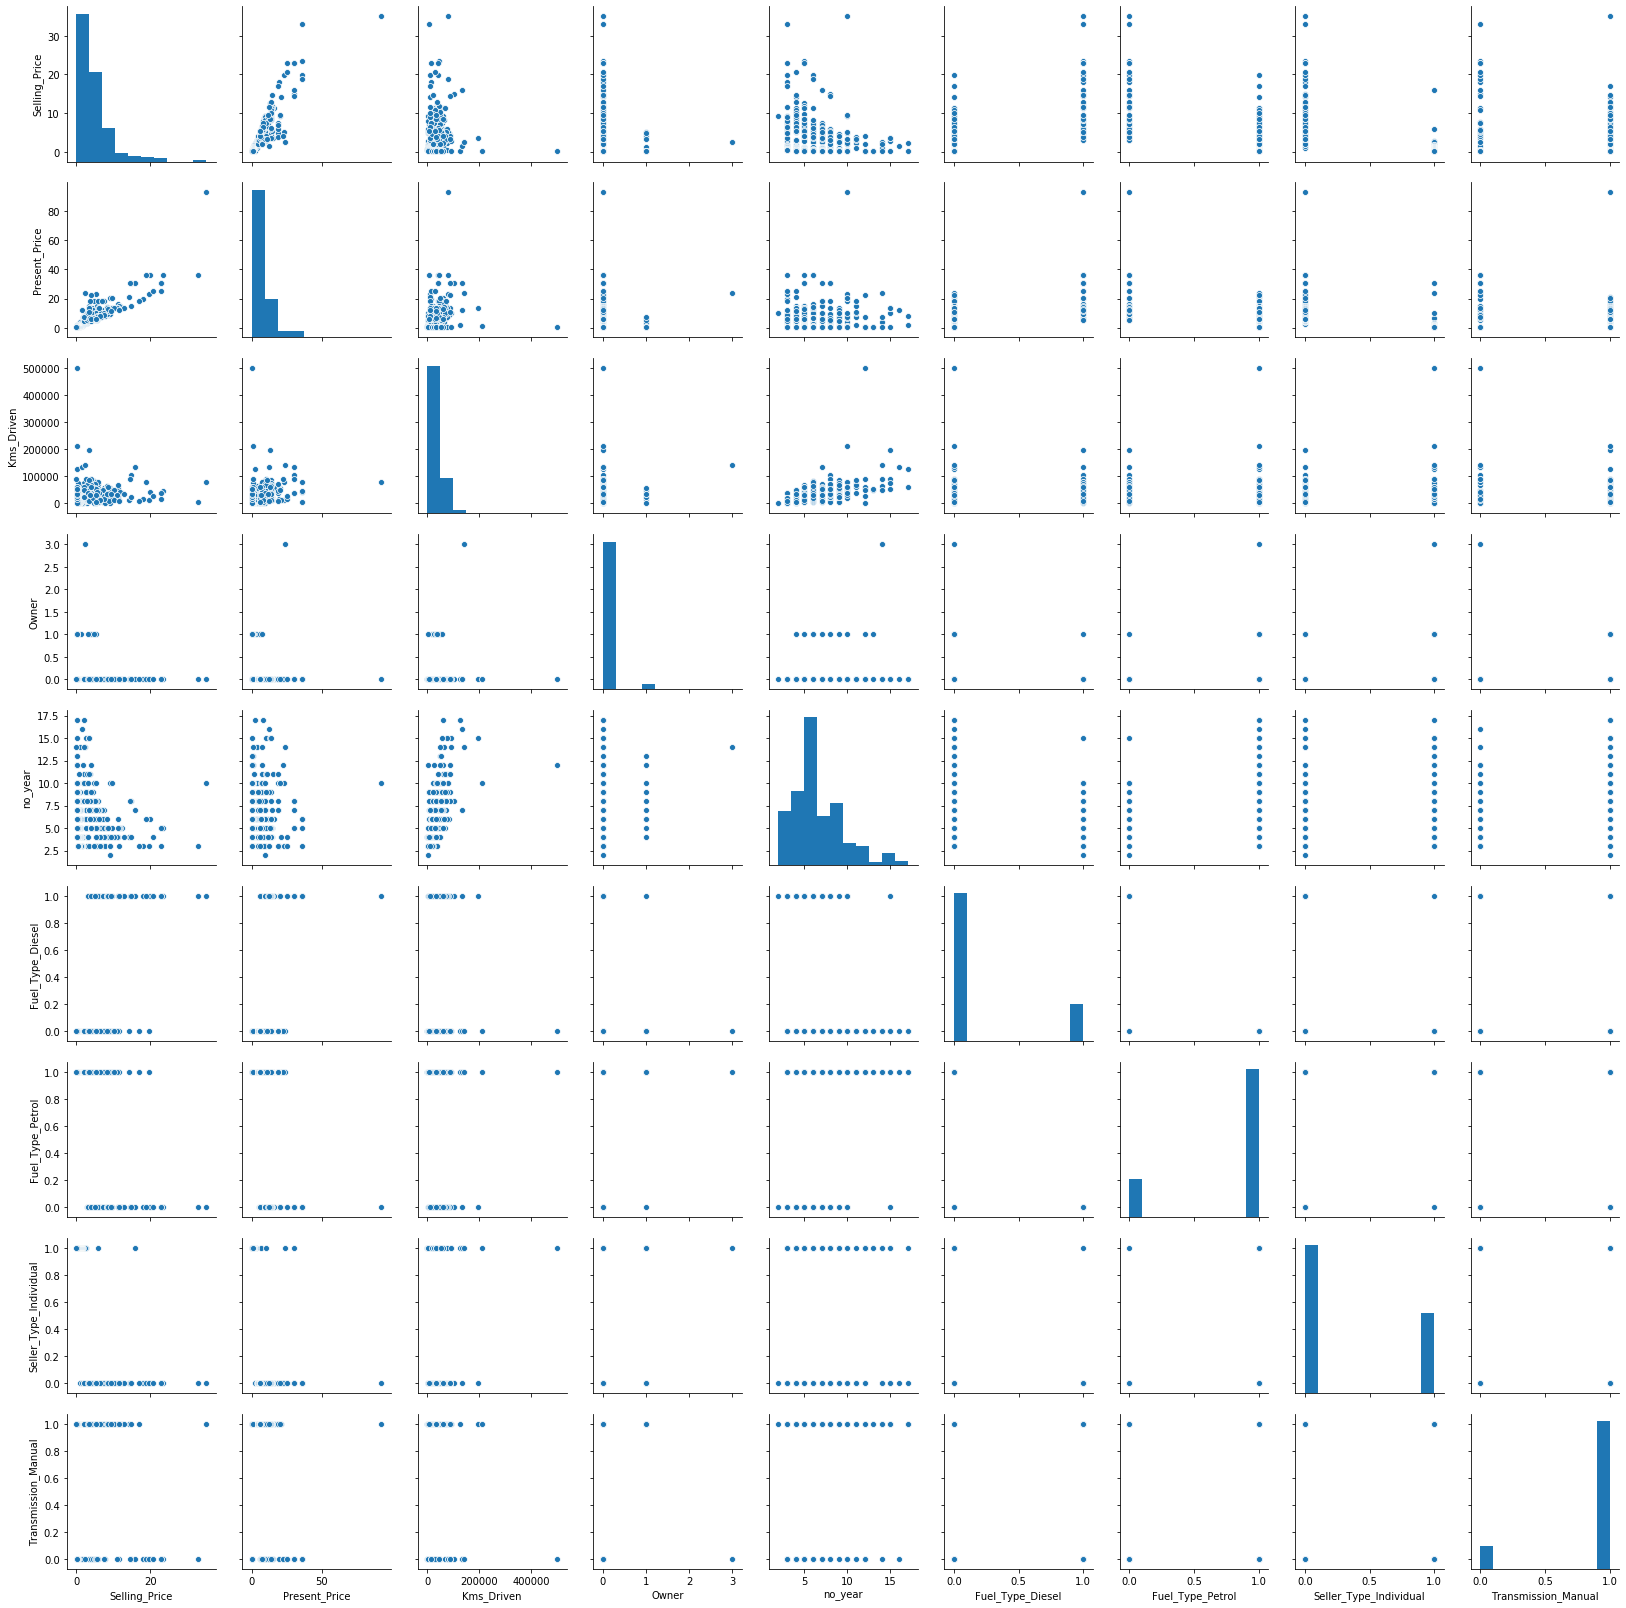

In [21]:
sns.pairplot(final_dataset)

In the above plots,it is very difficult to identify the corelation. 
To solve this problem, I will generate Heat map.

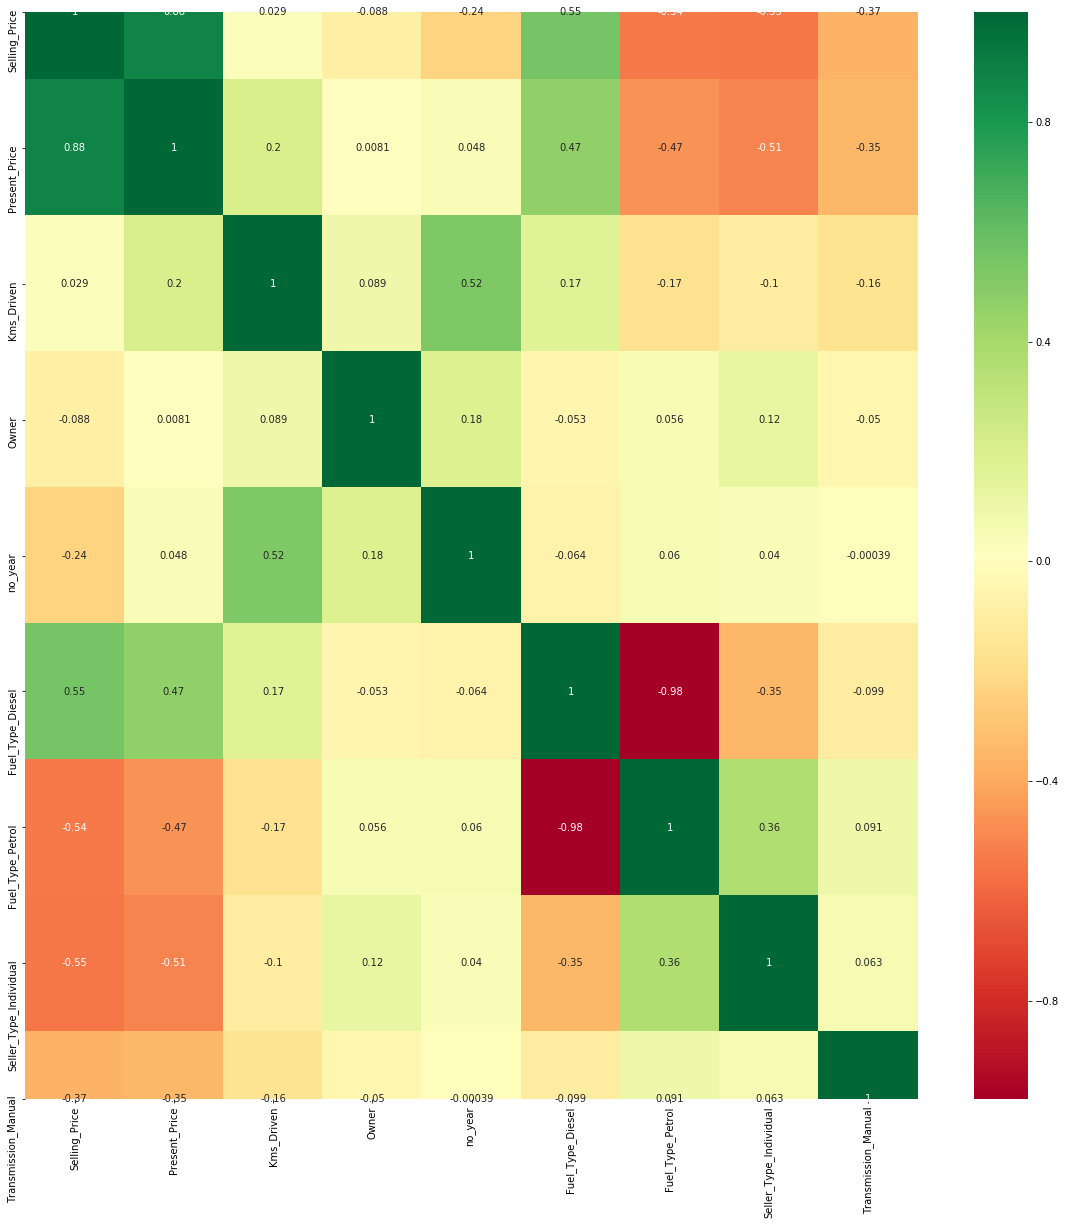

In [22]:
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap='RdYlGn')

#### Step_7 Evaluation:
1. From the above plots, One can say that, present price is highly corelated(positive) to selling price. Similarly, Fuel_Type_Diesel is negatively corelated to the Fuel_Type_Diesel.
2. In this case, number of features are not many, so I can keep all of them. But when the number of features are many, then one can add threshold for consideration of particular feature. Because high corelation shows same characteristic.

#### Step 8:
Seperate features(x) and label(y)

In [23]:
X = final_dataset.iloc[:,1:]
Y = final_dataset.iloc[:,0]

In [24]:
X.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [25]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

##### Step 9:
Select the important features

In [26]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)

F:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [27]:
print(model.feature_importances_)

[0.36918253 0.0456614  0.00073707 0.07351283 0.21398664 0.0306323
 0.12057454 0.14571268]


Showing the top 5 important features 

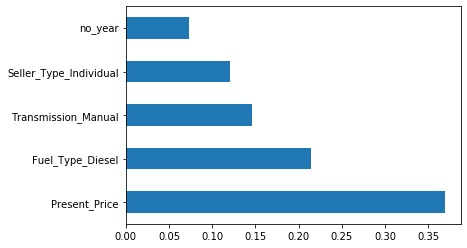

In [28]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In this project, I have considered all the features

#### Step 10:
Split the data in training dataset and testing dataset

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [30]:
X_train.shape

(240, 8)

#### Step 11:
Apply Machine learning regression algorithms
1. RandomForestRegressor

In [31]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

There are so many hyperparameters, which should be tuned to avoid overfitting and under fitting problems

In [32]:
import numpy as np

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [33]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


Random search method is faster than grid search method. 

In [34]:
rf_random = RandomizedSearchCV(estimator = rf_random, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [35]:
start_time = time.time()
rf_random.fit(X_train,Y_train)
end_time = time.time()
t_rf_random = end_time-start_time
print(f'Random Forest algorithm has taken {t_rf_random} seconds')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   0.7s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   20.1s finished


Random Forest algorithm has taken 20.788533926010132 seconds


In [36]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [37]:
rf_random.best_score_

-2.2337014950777094

In [38]:
predictions_rf_random = rf_random.predict(X_test)

In [39]:
from sklearn import metrics
MAE_rf_random = metrics.mean_absolute_error(Y_test, predictions_rf_random)
MSE_rf_random = metrics.mean_squared_error(Y_test, predictions_rf_random)
RMSE_rf_random = np.sqrt(metrics.mean_squared_error(Y_test, predictions_rf_random))
print('MAE:', MAE_rf_random)
print('MSE:', MSE_rf_random)
print('RMSE:', RMSE_rf_random)

MAE: 1.104767704918029
MSE: 9.060206136867231
RMSE: 3.0100176306572077


2. Linear Regression :

In [40]:
from sklearn.linear_model import RidgeCV, LinearRegression, Lasso
linear_regressor = LinearRegression()
start_time = time.time()
linear_regressor.fit(X_train, Y_train)
end_time = time.time()
t_linear_regressor = end_time-start_time
predictions_linear_regression = linear_regressor.predict(X_test)
MAE_linear_regressor = metrics.mean_absolute_error(Y_test, predictions_linear_regression)
MSE_linear_regressor = metrics.mean_squared_error(Y_test, predictions_linear_regression)
RMSE_linear_regressor = np.sqrt(metrics.mean_squared_error(Y_test, predictions_linear_regression))
print('MAE:', MAE_linear_regressor)
print('MSE:', MSE_linear_regressor)
print('RMSE:', RMSE_linear_regressor)
print(f'Linear regression algorithm has taken {t_linear_regressor} seconds')

MAE: 1.4527329119845442
MSE: 7.516547789789808
RMSE: 2.741632322137636
Linear regression algorithm has taken 0.0029926300048828125 seconds


#### Step 12:
Comparison of the various models results

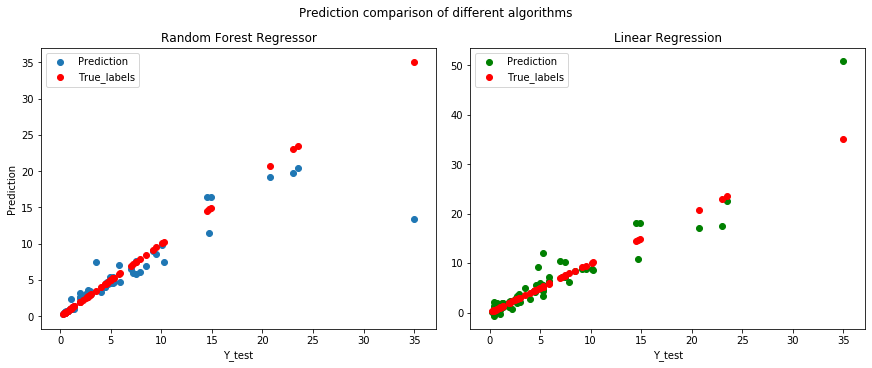

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 5),sharex=True,constrained_layout=True)
fig.suptitle('Prediction comparison of different algorithms')
ax1.scatter(Y_test,predictions_rf_random,label='Prediction')
ax1.scatter(Y_test,Y_test,c='red',label='True_labels')
ax1.set_title('Random Forest Regressor')
ax1.set(xlabel='Y_test', ylabel='Prediction')
ax1.legend()
ax2.scatter(Y_test,predictions_linear_regression,c='green',label='Prediction')
ax2.scatter(Y_test,Y_test,c='red',label='True_labels')
ax2.set_title('Linear Regression')
ax2.set(xlabel='Y_test')
ax2.legend()

##### Graph observation : Random Forest Regressor is more accurate than Linear Regression

Text(0.5, 1.0, 'Linear Regression')

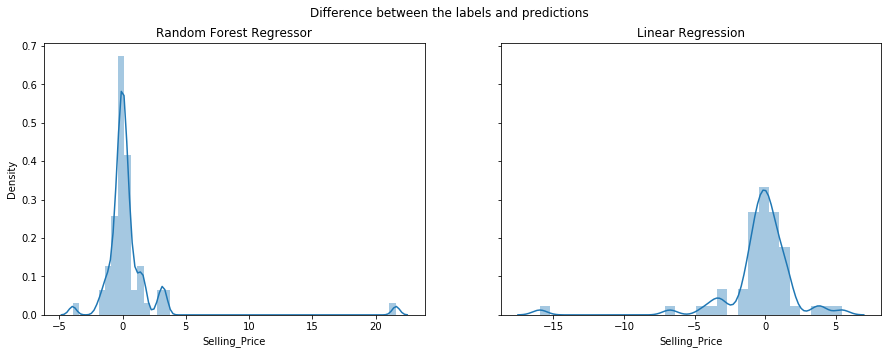

In [42]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Difference between the labels and predictions')
sns.distplot(Y_test-predictions_rf_random,ax=ax1)
ax1.set_title('Random Forest Regressor')
ax1.set(ylabel='Density')
sns.distplot(Y_test-predictions_linear_regression,ax=ax2)
ax2.set_title('Linear Regression')

##### Graph observation : Random Forest Regressor has less Standard Deviation than  Linear Regression.

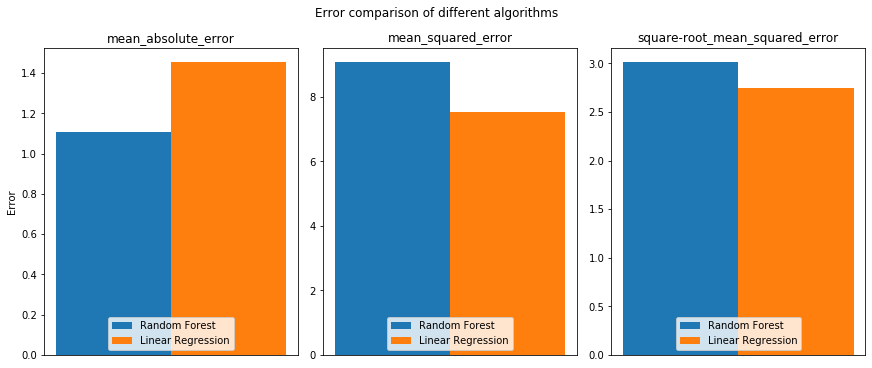

In [43]:
width = 0.35
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(12, 5),sharex=True,constrained_layout=True)
fig.suptitle('Error comparison of different algorithms')
ax1.bar(1 - width/2,MAE_rf_random, width,label = 'Random Forest')
ax1.bar(1 + width/2,MAE_linear_regressor, width,label = 'Linear Regression')
ax1.set_title('mean_absolute_error')
ax1.set(ylabel='Error')
ax1.set_xticks([])
ax1.legend(loc='lower center')
ax2.bar(1 - width/2,MSE_rf_random, width,label = 'Random Forest')
ax2.bar(1 + width/2,MSE_linear_regressor, width,label = 'Linear Regression')
ax2.set_title('mean_squared_error')
ax2.set_xticks([])
ax2.legend(loc='lower center')
ax3.bar(1 - width/2,RMSE_rf_random, width,label = 'Random Forest')
ax3.bar(1 + width/2,RMSE_linear_regressor, width,label = 'Linear Regression')
ax3.set_title('square-root_mean_squared_error')
ax3.set_xticks([])
ax3.legend(loc='lower center')

##### Graph observation : Random Forest Regressor has low absolute error than  Linear Regression.

###  Conclusion : 
#### After observing all graphs ,for this dataset Random Forest Regressor performs better than Linear Regresson. 

Here,the project ends. I hope, you have gained some valuable information.

### Thank You...!
#### See you in the next project... 